In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing import Preprocessing
import plotly.express as px
from collections import Counter
import numpy as np
import seaborn as sns

In [2]:
prp = Preprocessing()
df = prp.main()
df = Preprocessing.preprocess(df)
df.info()

starting preprocessing...
...preprocessing completed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   text       1600000 non-null  object
 1   sentiment  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [4]:
df.head()

,text,sentiment
0,a that a bummer you shoulda got david carr of ...,0
1,is upset that he cant updat his facebook by te...,0
2,i dive mani time for the ball manag to save 50...,0
3,my whole bodi feel itchi and like its on fire,0
4,no its not behav at all im mad why am i here b...,0


In [4]:
df['sentiment'].value_counts()

0    800000
1    800000
Name: sentiment, dtype: int64

In [22]:
df['text'].describe()

count     1600000
unique    1518542
top              
freq         3170
Name: text, dtype: object

In [4]:
df['word_count'] = df['text'].apply(lambda x:len(x.split()))
df

,text,sentiment,word_count
0,a that a bummer you shoulda got david carr of ...,0,16
1,is upset that he cant updat his facebook by te...,0,21
2,i dive mani time for the ball manag to save 50...,0,17
3,my whole bodi feel itchi and like its on fire,0,10
4,no its not behav at all im mad why am i here b...,0,20
...,...,...,...
1599995,just woke up having no school is the best feel...,1,11
1599996,thewdbcom very cool to hear old walt interview...,1,9
1599997,are you readi for your mojo makeov ask me for ...,1,11
1599998,happi 38th birthday to my boo of alll time tup...,1,12


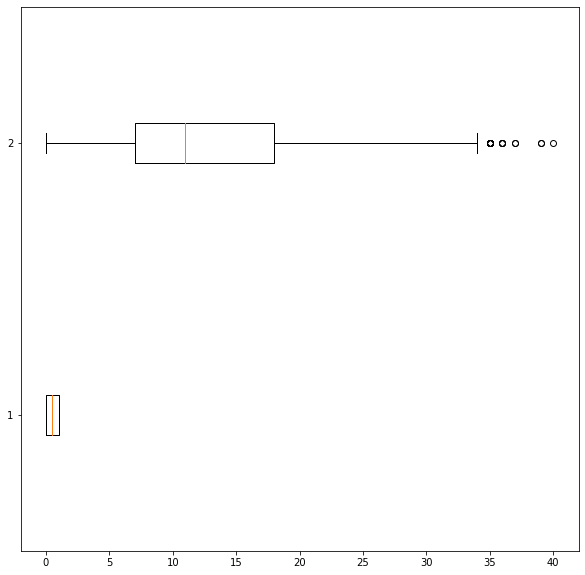

In [10]:
plt.figure(figsize=(10,10))
plt.boxplot(df[['sentiment', 'word_count']], vert=False)
plt.show()

<BarContainer object of 20 artists>

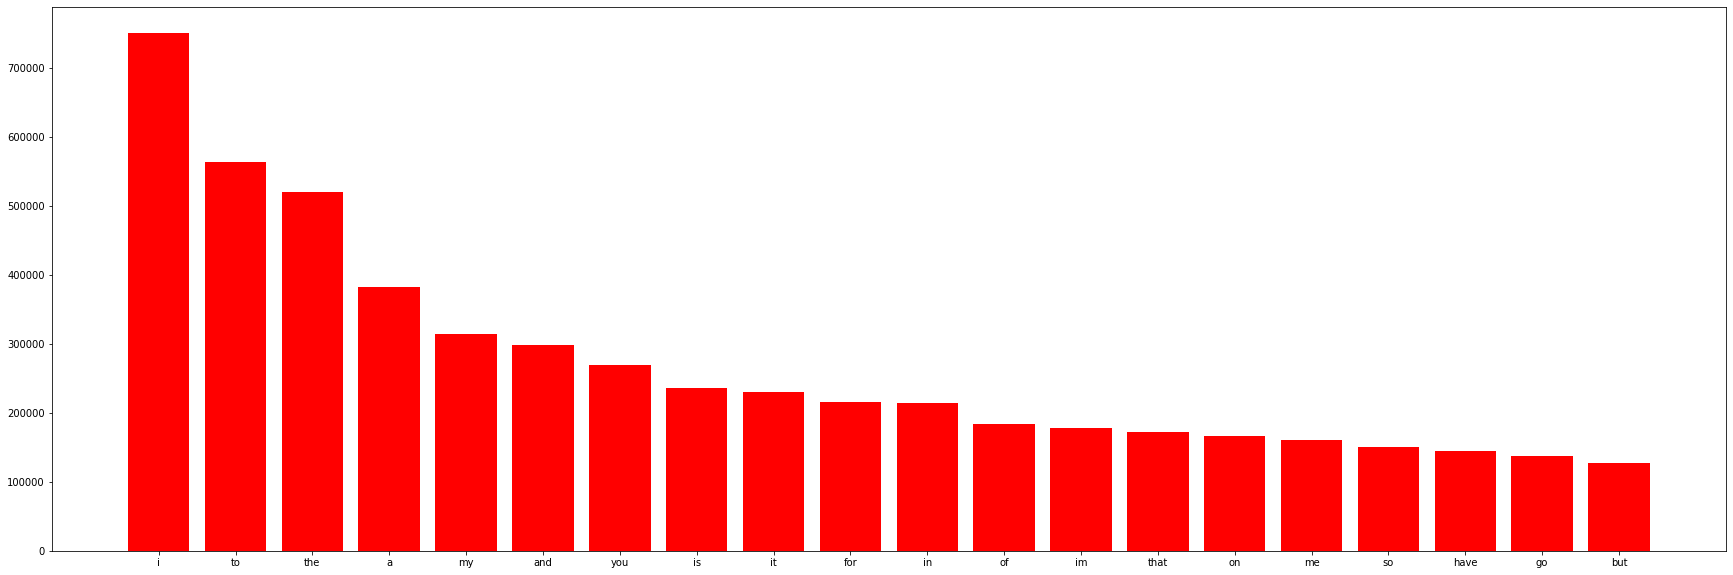

In [14]:
corpus = []
word = df['text'].str.split()
new = word.values.tolist()
corpus=[word for i in new for word in i]
counter=Counter(corpus)
most=counter.most_common(100)
x, y= [], []
for word,count in most[:20]:
    x.append(word)
    y.append(count)

plt.figure(figsize=(30,10))
plt.bar(x,y, color='red')

In [15]:
temp = pd.DataFrame(most)


fig = px.treemap(temp, path=[0], values=1,title='Tree of words most tweeted')
fig.show()

/home/annabelle/Documents/TwiiterSentimentAnalysis/venv/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<AxesSubplot:>

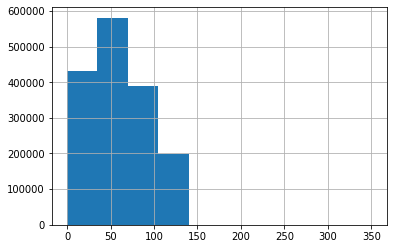

In [17]:
df['text'].str.len().hist()

In [ ]:
df['text_len'] = df['text'].astype(str).apply(len)
letter_avg = df.groupby('sentiment')['review_len'].mean().plot(kind='bar', figsize=(10,10))
plt.xlabel('Sentiment')
plt.ylabel('Count of Letters in Sentiment')
plt.xticks()
plt.yticks()
plt.title('Average Number of Letters per Sentiment Distribution')
plt.show()

In [ ]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
word_avg = df.groupby('sentiment')['word_count'].mean().plot(kind='bar', figsize=(10,10))
plt.xlabel('Sentiment')
plt.ylabel('Count of Words in Sentiment')
plt.xticks()
plt.yticks()
plt.title('Average Number of Words per Sentiment Distribution')
plt.show()

/tmp/ipykernel_18582/3100781362.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


<AxesSubplot:>

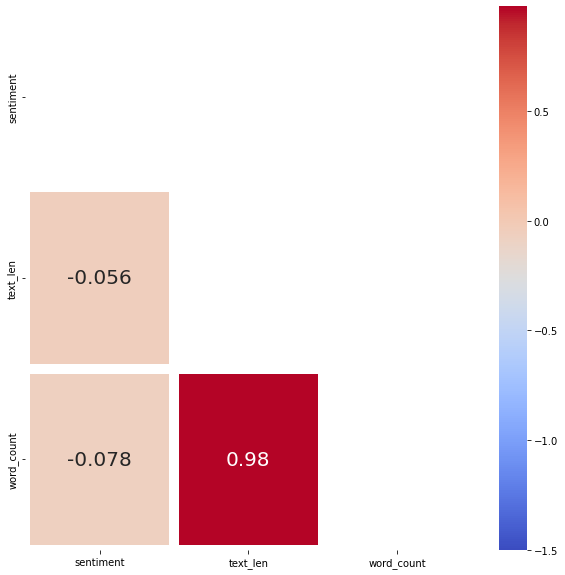

In [15]:
correlation = df[['sentiment', 'text_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
plt.xticks()
plt.yticks()
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 20}, linewidths=10, vmin=-1.5, mask=mask)